In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv('crime_data.csv')

In [3]:
crime_data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)

In [4]:
crime_data

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


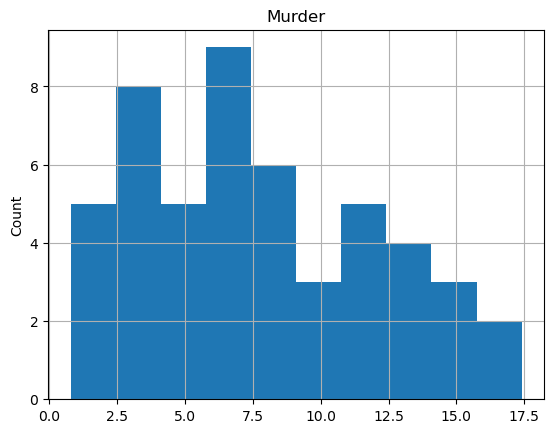

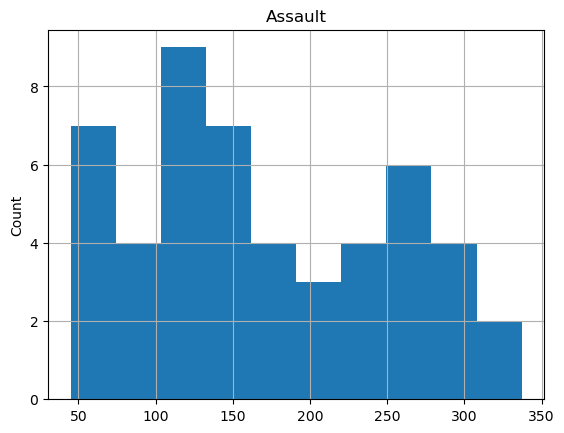

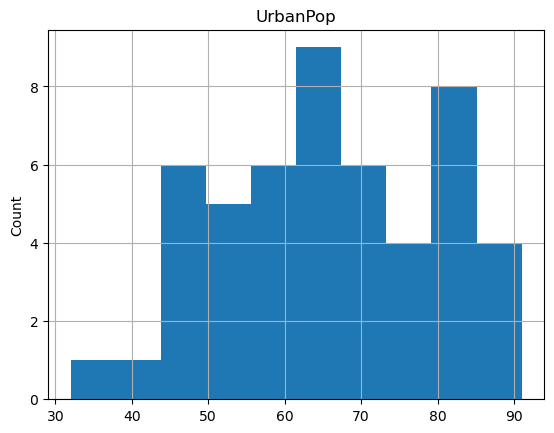

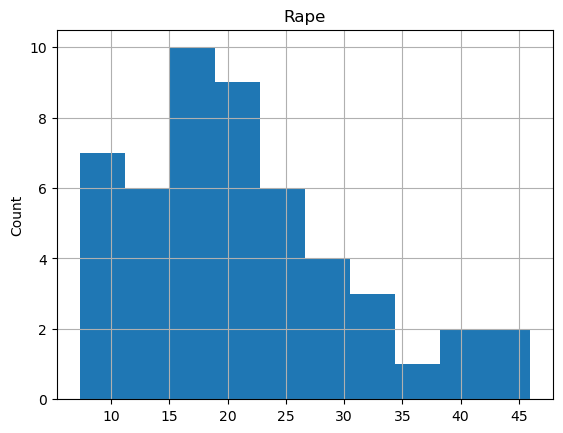

In [7]:
continuous_feature = [feature for feature in crime_data.columns if crime_data[feature].dtype!='O']
for feature in continuous_feature:
    crime_data1 = crime_data.copy()
    crime_data1[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


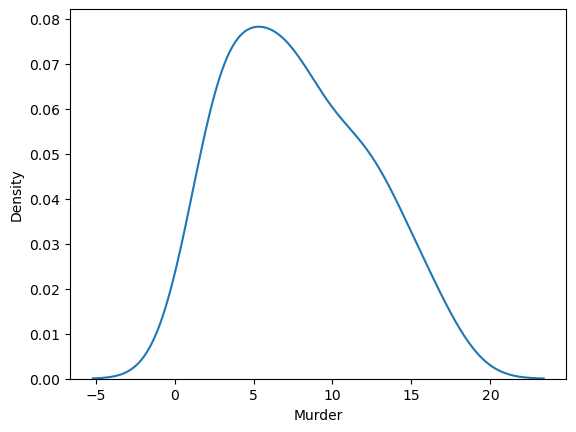

Assault


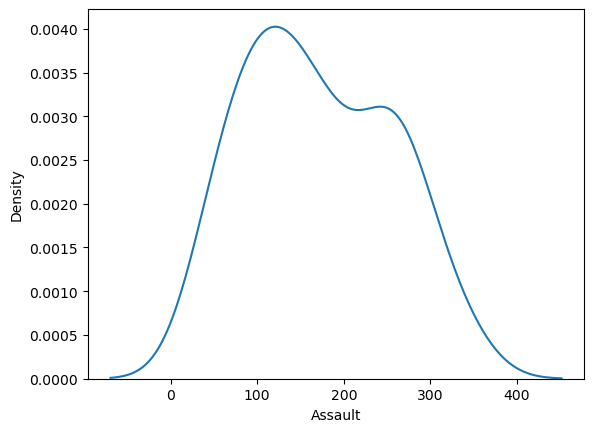

UrbanPop


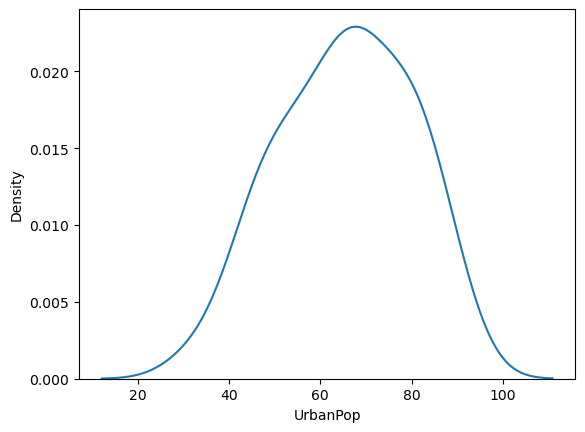

Rape


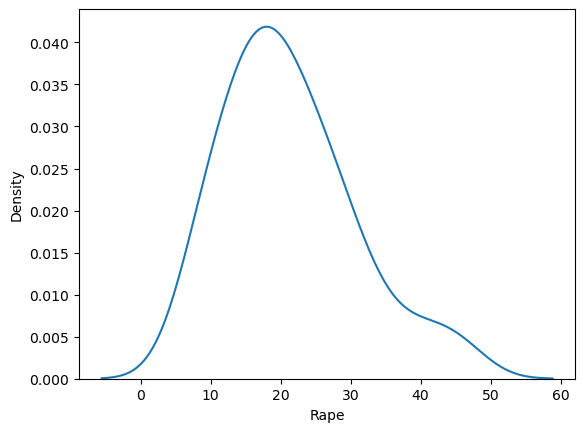

In [8]:
for n in continuous_feature:
    print(n)
    sns.kdeplot(crime_data[n])
    plt.show()

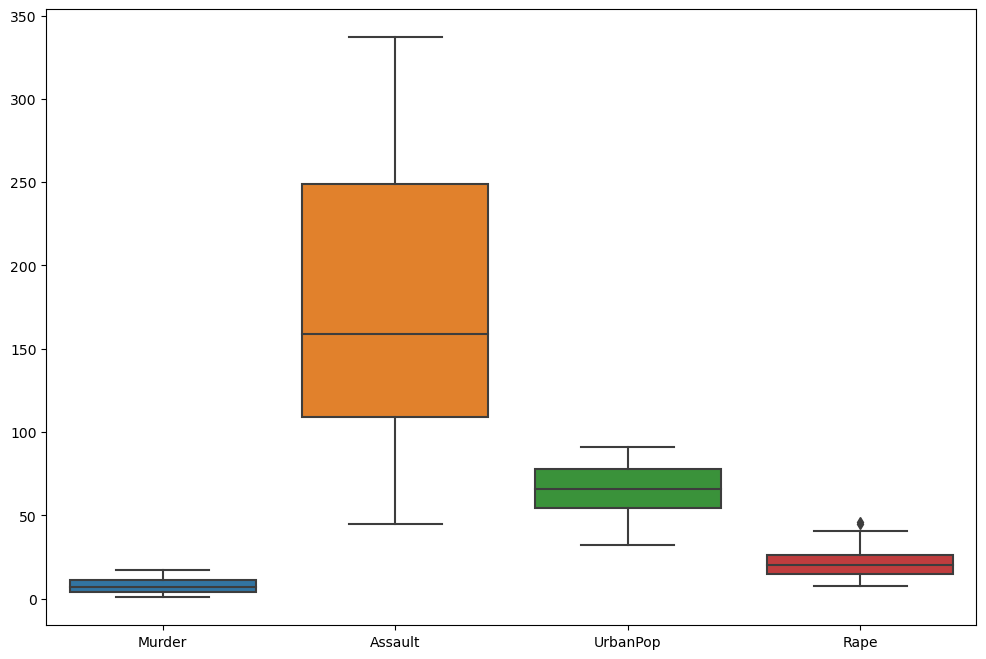

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data = crime_data)
plt.show()

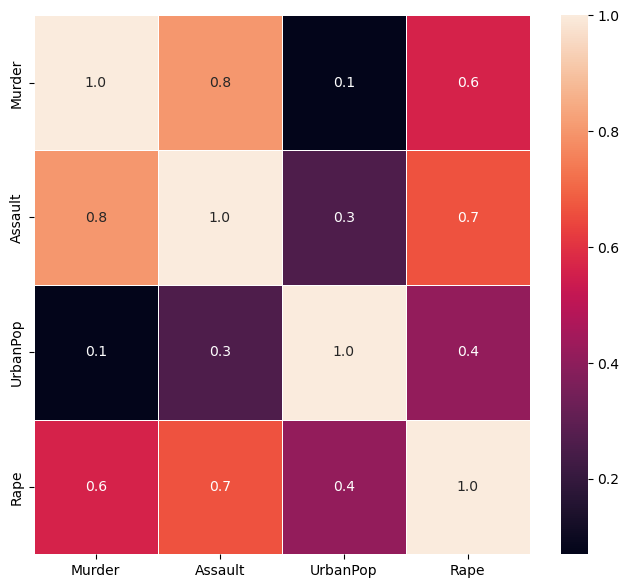

In [10]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(crime_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [11]:
high_murder = crime_data.sort_values('Murder', ascending = False, ignore_index=True)
high_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5
5,Alabama,13.2,236,58,21.2
6,Tennessee,13.2,188,59,26.9
7,North Carolina,13.0,337,45,16.1
8,Texas,12.7,201,80,25.5
9,Nevada,12.2,252,81,46.0


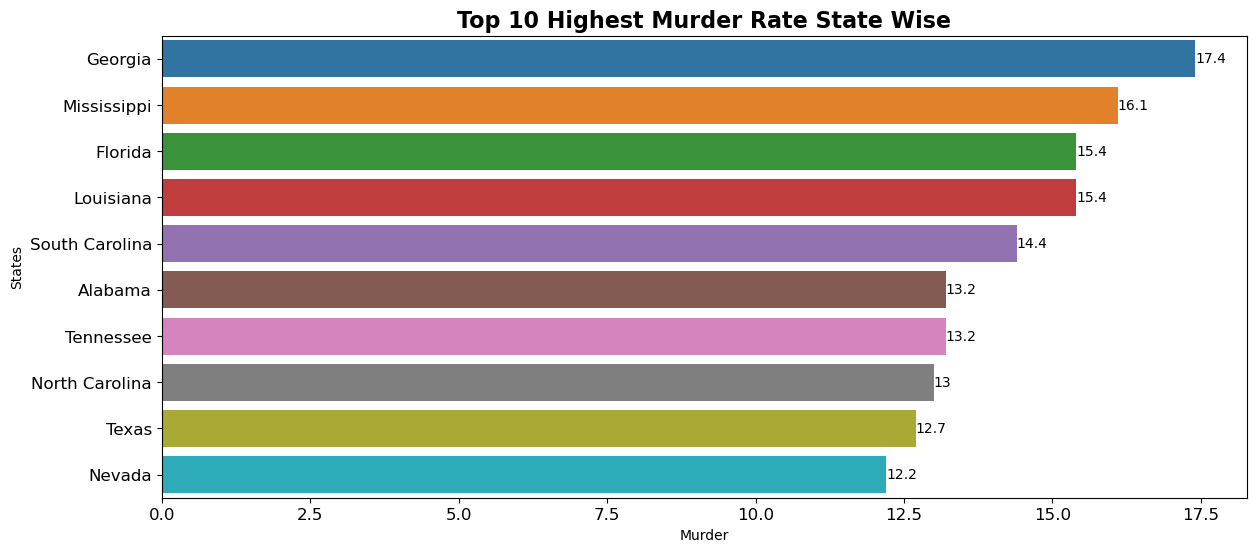

In [12]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_murder.Murder[:10], y = high_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

In [13]:
low_murder = crime_data.sort_values('Murder', ascending = True, ignore_index=True)
low_murder.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2
5,Wisconsin,2.6,53,66,10.8
6,Idaho,2.6,120,54,14.2
7,Minnesota,2.7,72,66,14.9
8,Utah,3.2,120,80,22.9
9,Connecticut,3.3,110,77,11.1


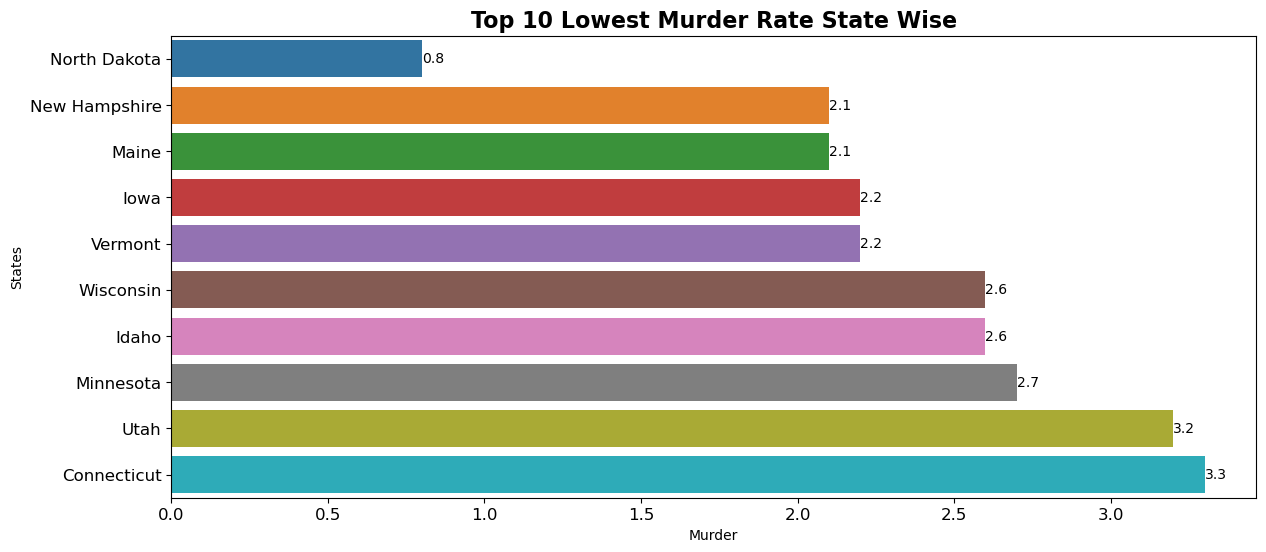

In [14]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_murder.Murder[:10], y = low_murder.States[:10])
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

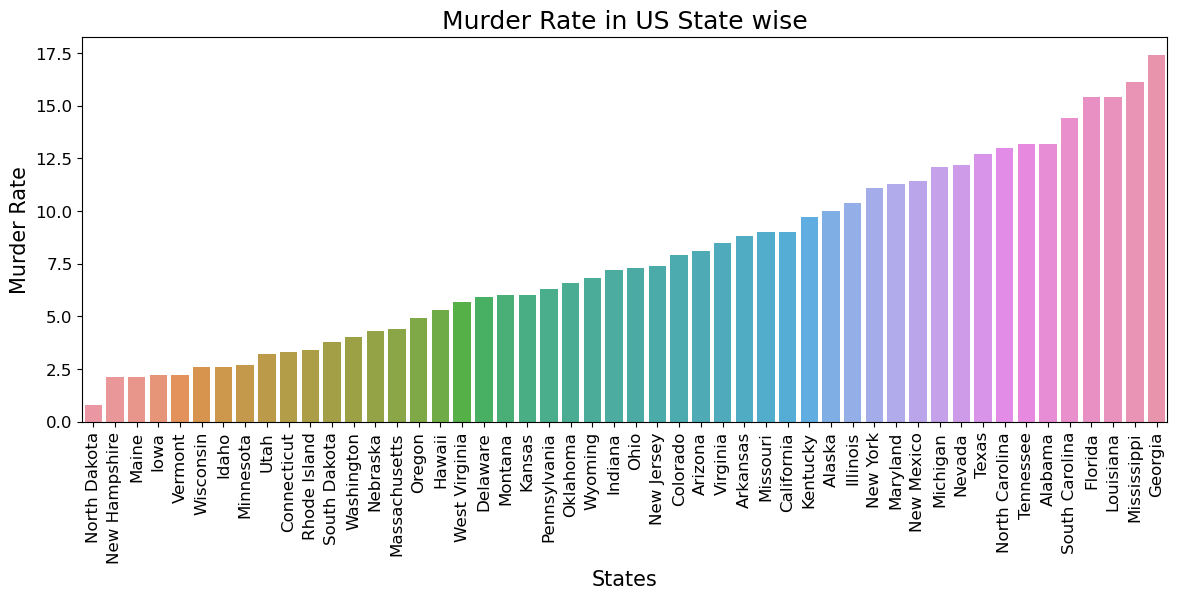

In [15]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="Murder", data=crime_data, order=crime_data.sort_values('Murder').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

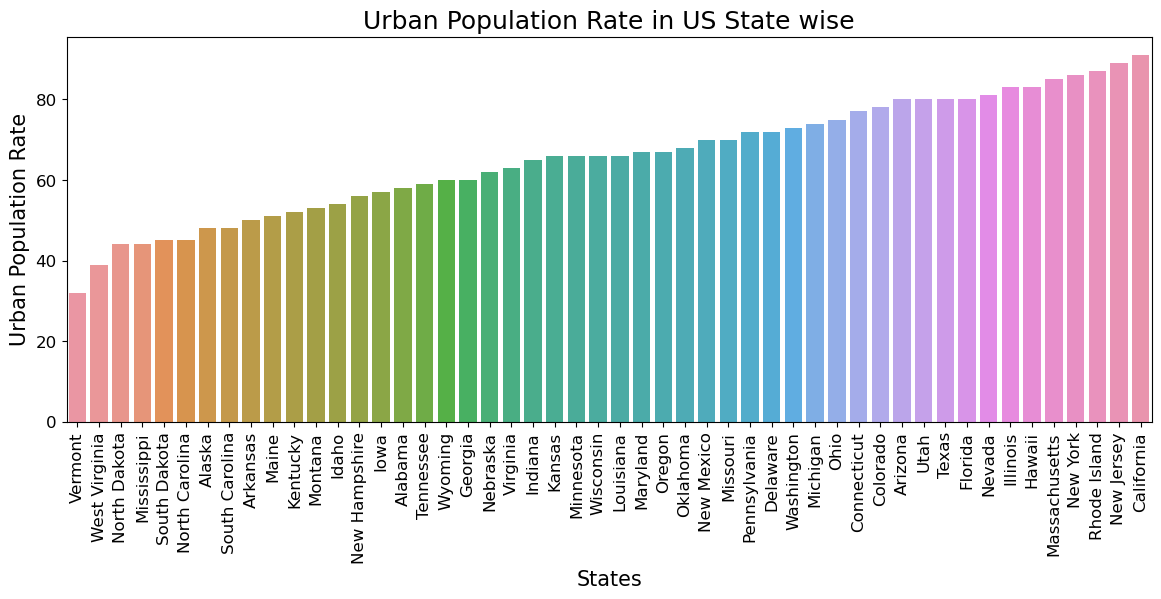

In [16]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=crime_data, order=crime_data.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

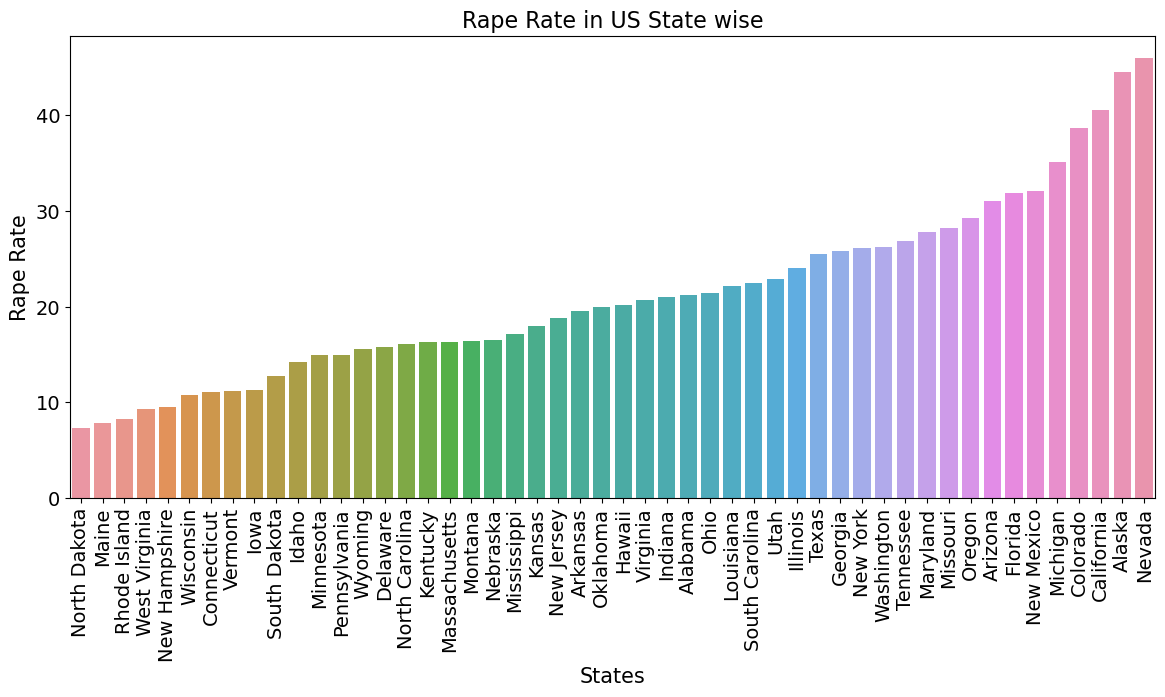

In [17]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="Rape", data=crime_data, order=crime_data.sort_values('Rape').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [18]:
crime_df = crime_data.set_index('States')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(crime_df)
scaled_df.shape

(50, 4)

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

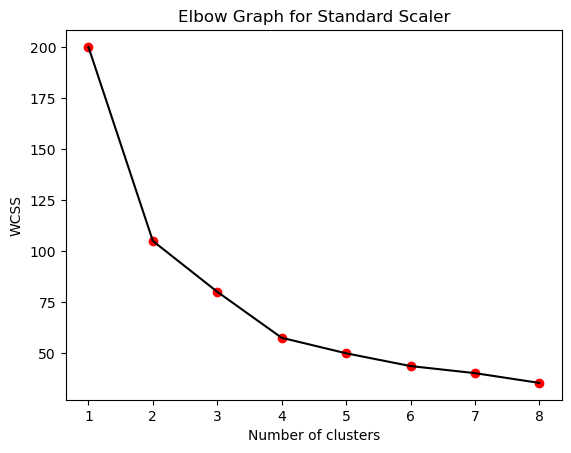

In [22]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [25]:
model.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [26]:
model.labels_

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
crime_data['Labels']=model.labels_

In [28]:
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


In [29]:
grp = crime_data.groupby('Labels')

In [30]:
for x,y in grp:
    print(y)
    print('_'*40)

           States  Murder  Assault  UrbanPop  Rape  Labels
3        Arkansas     8.8      190        50  19.5       0
6     Connecticut     3.3      110        77  11.1       0
7        Delaware     5.9      238        72  15.8       0
10         Hawaii     5.3       46        83  20.2       0
11          Idaho     2.6      120        54  14.2       0
13        Indiana     7.2      113        65  21.0       0
14           Iowa     2.2       56        57  11.3       0
15         Kansas     6.0      115        66  18.0       0
16       Kentucky     9.7      109        52  16.3       0
18          Maine     2.1       83        51   7.8       0
20  Massachusetts     4.4      149        85  16.3       0
22      Minnesota     2.7       72        66  14.9       0
24       Missouri     9.0      178        70  28.2       0
25        Montana     6.0      109        53  16.4       0
26       Nebraska     4.3      102        62  16.5       0
28  New Hampshire     2.1       57        56   9.5      

In [31]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Labels,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182


In [32]:
from scipy.cluster import hierarchy

In [33]:
ln = hierarchy.linkage(scaled_df,method='complete')

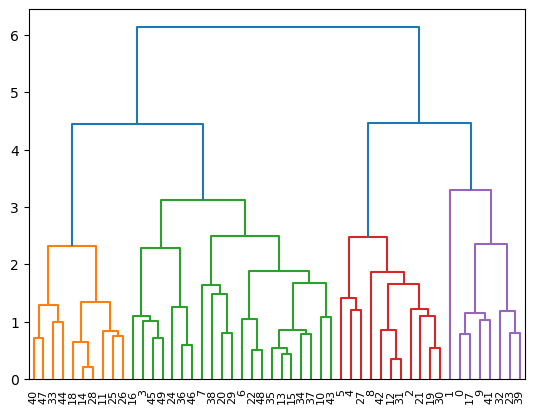

In [34]:
dn= hierarchy.dendrogram(ln)

In [35]:
from sklearn.preprocessing import StandardScaler

In [50]:
crime_data.set_index('States',inplace=True)

In [51]:
crime_data

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2


In [47]:
scaler= StandardScaler()

In [52]:
crime = scaler.fit_transform(crime_data)

In [53]:
crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.48507125],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.48507125],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.69774938],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.72760688],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.69774938],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.69774938],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.72760688],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.72760688],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.69774938],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.48507125],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.72760688],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.72760688],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.69774938],
       [-0.13637203, -0.70012057, -0.0

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
model1 = DBSCAN(eps=1,min_samples=4)

In [56]:
model1.fit(crime_df)

DBSCAN(eps=1, min_samples=4)

In [57]:
model1.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [58]:
crime_data['clusters']=model1.labels_


In [59]:
crime_data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,Labels
,,mean,mean,mean,mean,mean
0,-1,7.788,170.76,65.54,21.232,0.6


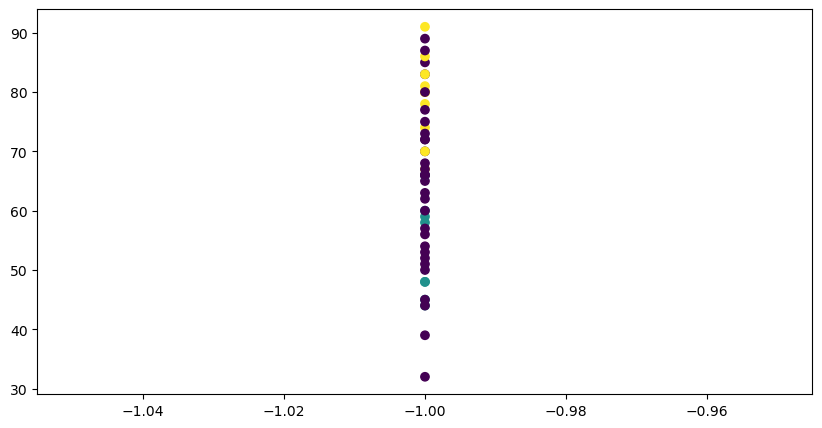

In [60]:
plt.figure(figsize=(10, 5))  
plt.scatter(crime_data['clusters'],crime_data['UrbanPop'], c=model.labels_) 